# Credit Card Default

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import datetime, timeit, time

In [139]:
df = pd.read_csv(r"C:\\Users\\LOTTE\\Desktop\\chapter07_credit_card_pay.csv")
df.head()

pd.set_option('display.max_rows', 20)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
...,...,...,...,...,...,...,...,...
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


In [142]:
df = df.rename(columns={'default payment next month':'Y'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [143]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
            ..
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
Length: 25, dtype: int64

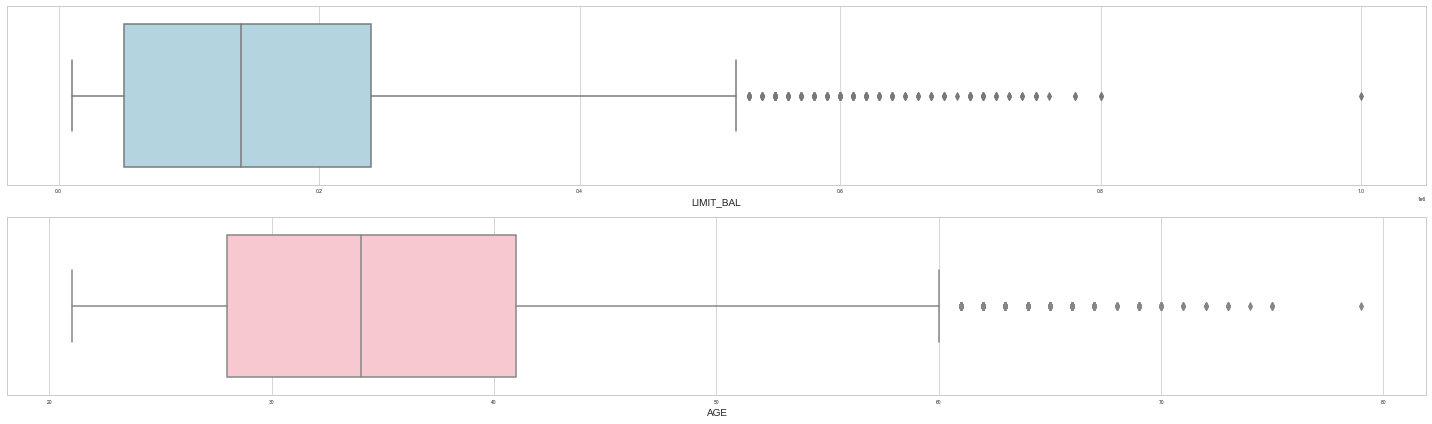

In [144]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))

sns.boxplot(x='LIMIT_BAL', data=df, color='lightblue', ax=ax[0])
sns.boxplot(x='AGE', data=df, color='pink', ax=ax[1])

plt.tight_layout()
plt.show()

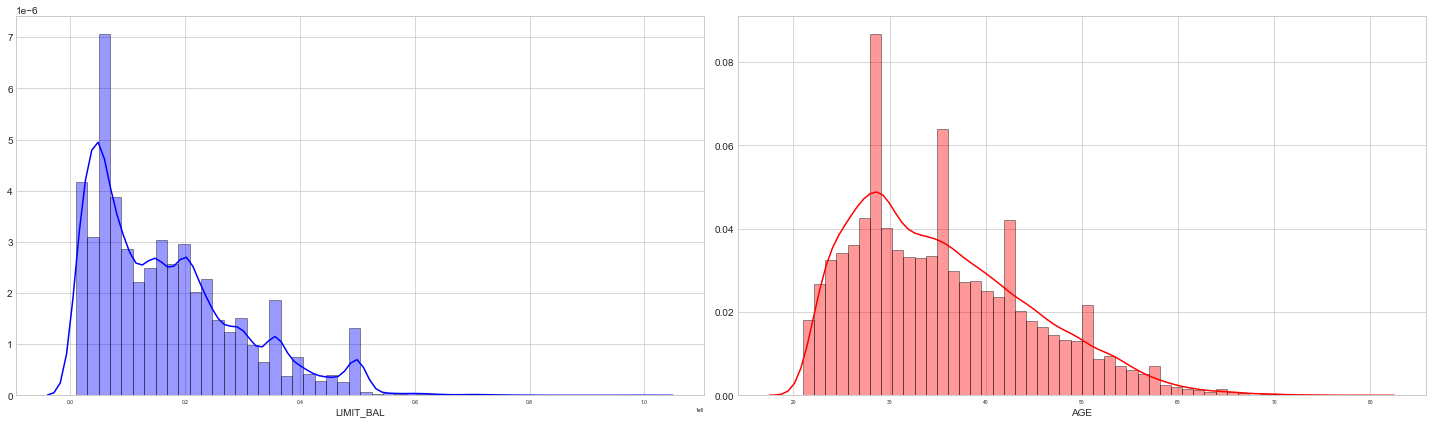

In [145]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.distplot(df['LIMIT_BAL'], hist_kws=dict(edgecolor='black', linewidth=1), color='blue', ax=ax[0])
sns.distplot(df['AGE'], hist_kws=dict(edgecolor='black', linewidth=1), color='red', ax=ax[1])

plt.tight_layout()
plt.show()

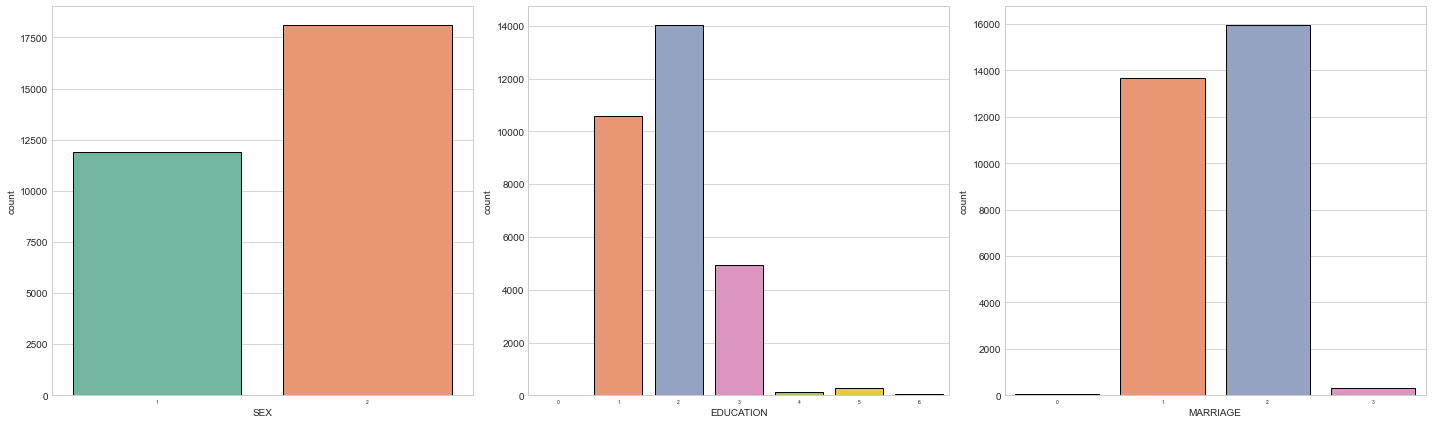

In [146]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.countplot(x='SEX', data=df, palette='Set2', edgecolor='black', ax=ax[0])
sns.countplot(x='EDUCATION', data=df, palette='Set2', edgecolor='black', ax=ax[1])
sns.countplot(x='MARRIAGE', data=df, palette='Set2', edgecolor='black', ax=ax[2])

plt.tight_layout()
plt.show()

In [147]:
print(f"male ratio:\t {len(df[df['SEX'] == 1]) / len(df) * 100:.2f}%")
print(f"female ratio:\t {len(df[df['SEX'] == 2]) / len(df) * 100:.2f}%")

male ratio:	 39.63%
female ratio:	 60.37%


In [148]:
# 연령 구간화
df['AGE_RANGE'] = np.where(df['AGE'] < 30, 20, (np.where(df['AGE'] < 40, 30, (np.where(df['AGE'] < 50, 40, (np.where(df['AGE'] < 60, 50, (np.where(df['AGE'] < 70, 60, 70)))))))))

In [149]:
# 1: 대학원, 2: 대학교, 3: 고등학교는 그대로 유지, 0, 4, 5, 6은 '모름'이므로 하나로 합쳐주기
df['EDUCATION'] = np.where(((df['EDUCATION'] == 0) | (df['EDUCATION'] == 4) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6)), 4, df['EDUCATION'])

In [150]:
# 1: 기혼, 2: 독신이므로 그대로 유지, 0, 3은 '모름'이므로 하나로 합쳐주기
df['MARRIAGE'] = np.where(((df['MARRIAGE'] == 0) | (df['MARRIAGE'] == 3)), 3, df['MARRIAGE'])

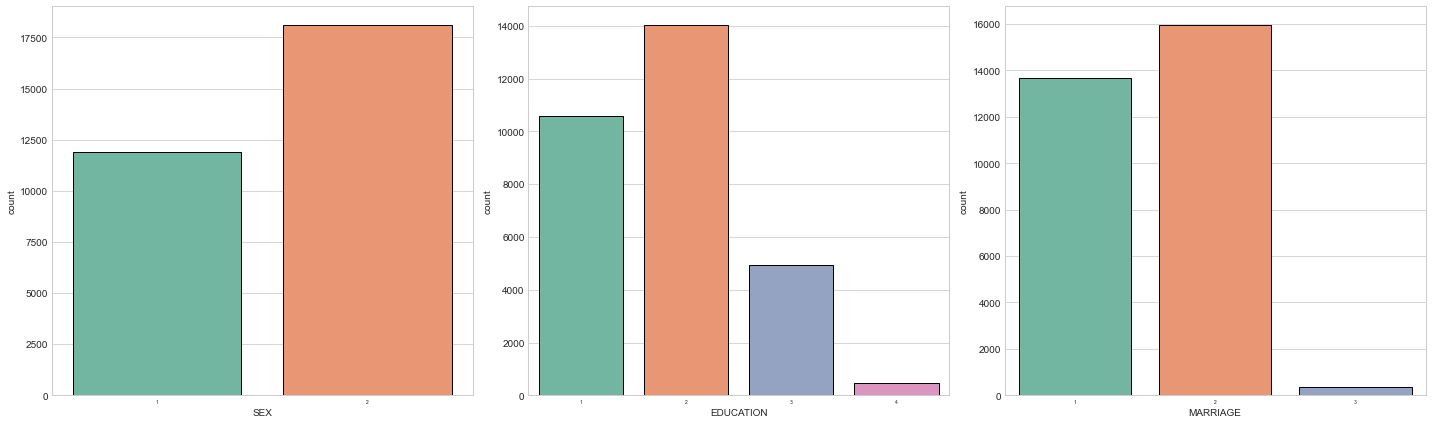

In [151]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.countplot(x='SEX', data=df, palette='Set2', edgecolor='black', ax=ax[0])
sns.countplot(x='EDUCATION', data=df, palette='Set2', edgecolor='black', ax=ax[1])
sns.countplot(x='MARRIAGE', data=df, palette='Set2', edgecolor='black', ax=ax[2])

plt.tight_layout()
plt.show()

In [152]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,AGE_RANGE
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,20
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,20
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,30
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50


In [153]:
# 결측치 확인
# 이상치 확인
# 연속 변수 구간화
# 불필요한 데이터 클렌징
# 파생 변수 생성
# 인코딩, 스케일링

In [154]:
df['PAY/BILL'] = (df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) / \
                 (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']) * 100

# 결측치, 무한대 처리
df['PAY/BILL'] = df['PAY/BILL'].replace([np.inf, -np.inf], np.nan)
df['PAY/BILL'] = df['PAY/BILL'].fillna(0)

# 이상치(범위) 처리
df['PAY/BILL'] = np.where(df['PAY/BILL'] > 100, 100, df['PAY/BILL'])
df['PAY/BILL'] = np.where(df['PAY/BILL'] < 0, 0, df['PAY/BILL'])

In [155]:
df['LIMIT_GP'] = np.where(df['LIMIT_BAL'] <= 100000, 1, (np.where(df['LIMIT_BAL'] <= 300000, 2, (np.where(df['LIMIT_BAL'] <= 500000, 3, 4)))))

In [156]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,AGE_RANGE,PAY/BILL,LIMIT_GP
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,20,8.943406,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,20,29.279147,2
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,30,10.838834,1
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,30,3.625926,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,50,54.005433,1


In [157]:
(df.corr()['Y'].sort_values(ascending=False))

Y            1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
               ...   
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
PAY/BILL    -0.122634
LIMIT_GP    -0.149524
LIMIT_BAL   -0.153520
Name: Y, Length: 28, dtype: float64

(-25.0, 25.0)

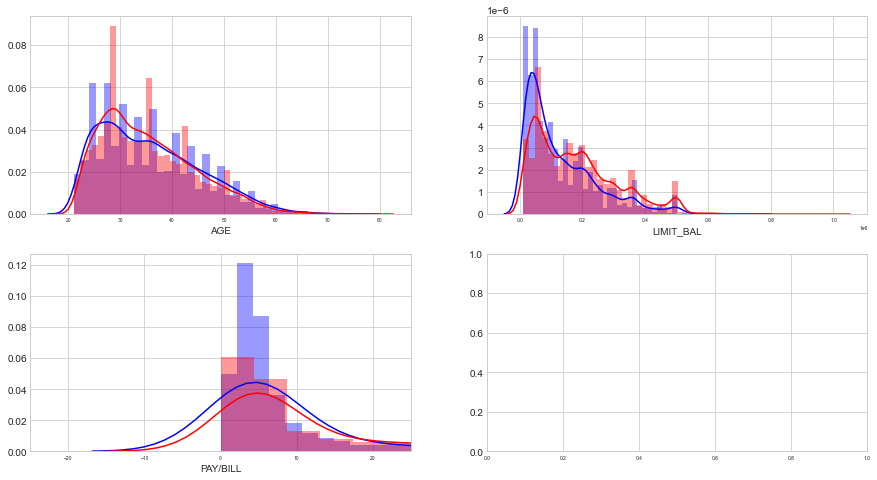

In [158]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
sns.distplot(df[df['Y'] == 1]['AGE'], color='blue', ax=ax[0][0])
sns.distplot(df[df['Y'] == 0]['AGE'], color='red', ax=ax[0][0])

sns.distplot(df[df['Y'] == 1]['LIMIT_BAL'], color='blue', ax=ax[0][1])
sns.distplot(df[df['Y'] == 0]['LIMIT_BAL'], color='red', ax=ax[0][1])

sns.distplot(df[df['Y'] == 1]['PAY/BILL'], color='blue', ax=ax[1][0])
sns.distplot(df[df['Y'] == 0]['PAY/BILL'], color='red', ax=ax[1][0])
ax[1][0].set_xlim(-25, 25)

In [83]:
df_scale_needed = df[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_scale_needed

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_scale_needed)
df_scaled = scaler.transform(df_scale_needed)

In [85]:
df_scaled = pd.DataFrame(df_scaled, columns=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [86]:
df = df.drop(['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [87]:
df.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)

In [ ]:
df = pd.concat([df, df_scaled], axis=1)
df.head()

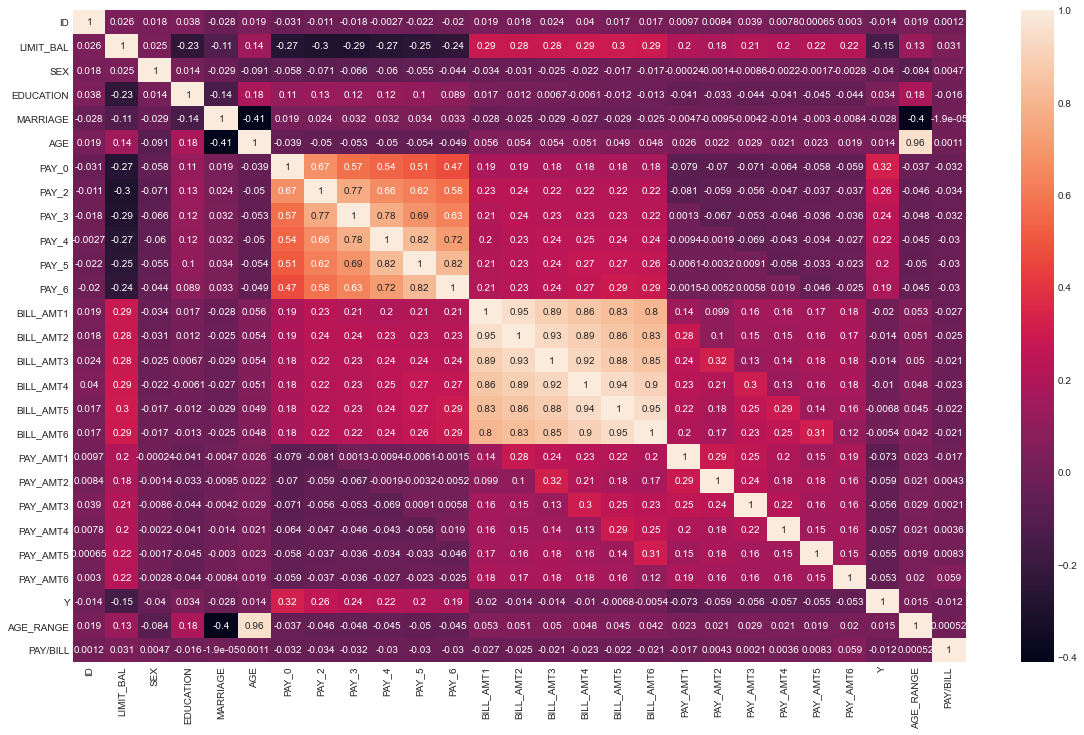

In [32]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

In [159]:
from sklearn.model_selection import train_test_split

feature = df.drop(['Y'], axis=1)
label = df['Y']

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, stratify=label)

In [160]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

21000
9000
21000
9000


In [161]:
X_train = X_train.drop('ID', axis=1)
X_test2 = X_test.drop('ID', axis=1)

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [163]:
dc_clf = DecisionTreeClassifier(min_samples_leaf=30)
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=1234)
gb_clf = GradientBoostingClassifier()
xg_clf = XGBClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=1234)
lg_clf = LGBMClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=1234)
nn_clf = MLPClassifier()

In [164]:
dc_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
xg_clf.fit(X_train, y_train)
lg_clf.fit(X_train, y_train)
nn_clf.fit(X_train, y_train)

MLPClassifier()

In [165]:
pred_proba_dc_clf = dc_clf.predict_proba(X_test2)
pred_proba_rf_clf = rf_clf.predict_proba(X_test2)
pred_proba_gb_clf = gb_clf.predict_proba(X_test2)
pred_proba_xg_clf = xg_clf.predict_proba(X_test2)
pred_proba_lg_clf = lg_clf.predict_proba(X_test2)
pred_proba_nn_clf = nn_clf.predict_proba(X_test2)

pred_proba_num_dc_clf = pred_proba_dc_clf[:,1]
pred_proba_num_rf_clf = pred_proba_rf_clf[:,1]
pred_proba_num_gb_clf = pred_proba_gb_clf[:,1]
pred_proba_num_xg_clf = pred_proba_xg_clf[:,1]
pred_proba_num_lg_clf = pred_proba_lg_clf[:,1]
pred_proba_num_nn_clf = pred_proba_nn_clf[:,1]

pred_dc_clf = dc_clf.predict(X_test2)
pred_rf_clf = rf_clf.predict(X_test2)
pred_gb_clf = gb_clf.predict(X_test2)
pred_xg_clf = xg_clf.predict(X_test2)
pred_lg_clf = lg_clf.predict(X_test2)
pred_nn_clf = nn_clf.predict(X_test2)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

model_name = ['Decision Tree', 'Random Forest', 'Gradient Boost', 'XG Boost', 'Light GBM', 'Neural Network']
model_pred = [pred_dc_clf, pred_rf_clf, pred_gb_clf, pred_xg_clf, pred_lg_clf, pred_nn_clf]

for name, pred in zip(model_name, model_pred):
    print('='*50)
    print(f"Model: {name}")
    print('-'*50)
    print(f"Accuracy:\t {accuracy_score(y_test, pred):.4f}")
    print(f"Precision:\t {precision_score(y_test, pred):.4f}")
    print(f"Recall:\t\t {recall_score(y_test, pred):.4f}")
    print(f"F1:\t\t {f1_score(y_test, pred):.4f}")
    print('-'*50)    
    print('Confusion Matrix')
    print(confusion_matrix(y_test, pred))
    print('-'*50)    
    print('Classification Report')
    print(classification_report(y_test, pred))   
    

Model: Decision Tree
--------------------------------------------------
Accuracy:	 0.8032
Precision:	 0.5947
Recall:		 0.3471
F1:		 0.4383
--------------------------------------------------
Confusion Matrix
[[6538  471]
 [1300  691]]
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7009
           1       0.59      0.35      0.44      1991

    accuracy                           0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.78      9000

Model: Random Forest
--------------------------------------------------
Accuracy:	 0.8189
Precision:	 0.6771
Recall:		 0.3466
F1:		 0.4585
--------------------------------------------------
Confusion Matrix
[[6680  329]
 [1301  690]]
--------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    

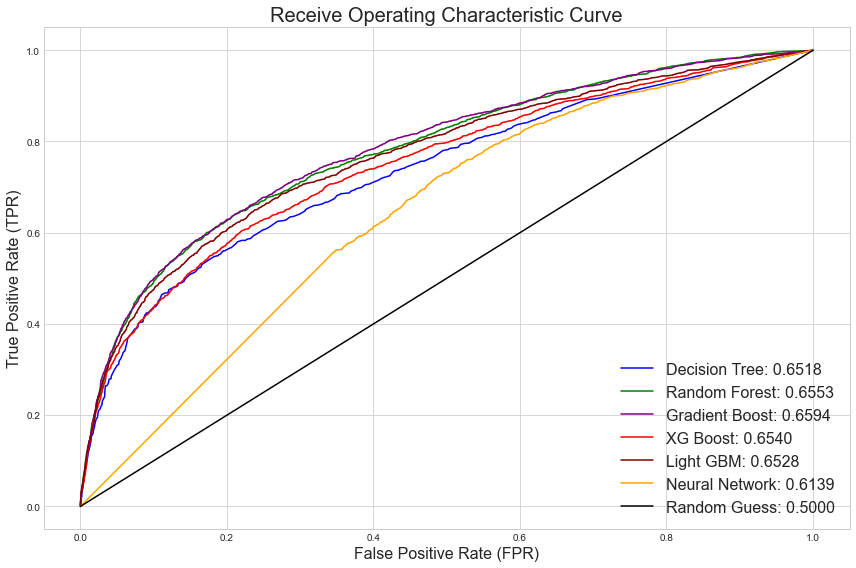

In [117]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
fpr_dc, tpr_dc, threshold = roc_curve(y_test, pred_proba_num_dc_clf)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, pred_proba_num_rf_clf)
fpr_gb, tpr_gb, threshold = roc_curve(y_test, pred_proba_num_gb_clf)
fpr_xg, tpr_xg, threshold = roc_curve(y_test, pred_proba_num_xg_clf)
fpr_lg, tpr_lg, threshold = roc_curve(y_test, pred_proba_num_lg_clf)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, pred_proba_num_nn_clf)

sns.lineplot(x=fpr_dc, y=tpr_dc, ax=ax, color='blue', label=f'Decision Tree: {roc_auc_score(y_test, pred_dc_clf):.4f}')
sns.lineplot(x=fpr_rf, y=tpr_rf, ax=ax, color='green', label=f'Random Forest: {roc_auc_score(y_test, pred_rf_clf):.4f}')
sns.lineplot(x=fpr_gb, y=tpr_gb, ax=ax, color='purple', label=f'Gradient Boost: {roc_auc_score(y_test, pred_gb_clf):.4f}')
sns.lineplot(x=fpr_xg, y=tpr_xg, ax=ax, color='red', label=f'XG Boost: {roc_auc_score(y_test, pred_xg_clf):.4f}')
sns.lineplot(x=fpr_lg, y=tpr_lg, ax=ax, color='maroon', label=f'Light GBM: {roc_auc_score(y_test, pred_lg_clf):.4f}')
sns.lineplot(x=fpr_nn, y=tpr_nn, ax=ax, color='orange', label=f'Neural Network: {roc_auc_score(y_test, pred_nn_clf):.4f}')

sns.lineplot([0,1], [0,1], ax=ax, color='black', label='Random Guess: 0.5000')

ax.set_title("Receive Operating Characteristic Curve", fontsize=20)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

ax.legend(loc=4, fontsize=16)
plt.tight_layout()
plt.show()

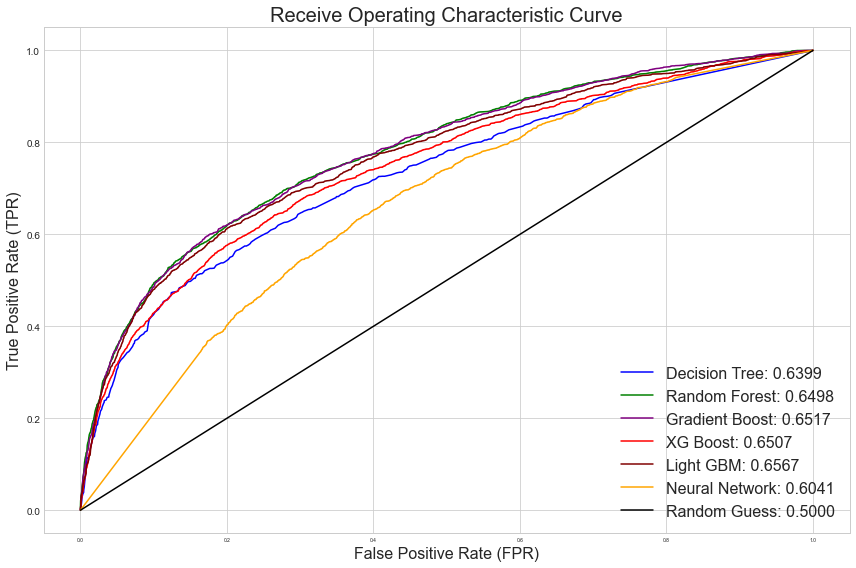

In [167]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
fpr_dc, tpr_dc, threshold = roc_curve(y_test, pred_proba_num_dc_clf)
fpr_rf, tpr_rf, threshold = roc_curve(y_test, pred_proba_num_rf_clf)
fpr_gb, tpr_gb, threshold = roc_curve(y_test, pred_proba_num_gb_clf)
fpr_xg, tpr_xg, threshold = roc_curve(y_test, pred_proba_num_xg_clf)
fpr_lg, tpr_lg, threshold = roc_curve(y_test, pred_proba_num_lg_clf)
fpr_nn, tpr_nn, threshold = roc_curve(y_test, pred_proba_num_nn_clf)

sns.lineplot(x=fpr_dc, y=tpr_dc, ax=ax, color='blue', label=f'Decision Tree: {roc_auc_score(y_test, pred_dc_clf):.4f}')
sns.lineplot(x=fpr_rf, y=tpr_rf, ax=ax, color='green', label=f'Random Forest: {roc_auc_score(y_test, pred_rf_clf):.4f}')
sns.lineplot(x=fpr_gb, y=tpr_gb, ax=ax, color='purple', label=f'Gradient Boost: {roc_auc_score(y_test, pred_gb_clf):.4f}')
sns.lineplot(x=fpr_xg, y=tpr_xg, ax=ax, color='red', label=f'XG Boost: {roc_auc_score(y_test, pred_xg_clf):.4f}')
sns.lineplot(x=fpr_lg, y=tpr_lg, ax=ax, color='maroon', label=f'Light GBM: {roc_auc_score(y_test, pred_lg_clf):.4f}')
sns.lineplot(x=fpr_nn, y=tpr_nn, ax=ax, color='orange', label=f'Neural Network: {roc_auc_score(y_test, pred_nn_clf):.4f}')

sns.lineplot([0,1], [0,1], ax=ax, color='black', label='Random Guess: 0.5000')

ax.set_title("Receive Operating Characteristic Curve", fontsize=20)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

ax.legend(loc=4, fontsize=16)
plt.tight_layout()
plt.show()

In [168]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rf_clf.predict_proba(X_train)[:, 1] 
y_pred_test_proba = rf_clf.predict_proba(X_test2)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8075445732945588
roc_score_test : 0.7790256969603334


In [169]:
xg_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 7,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 300,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 1234,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [174]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [4, 6, 8],
              'n_estimators': [100, 200],
              'random_state':[123456]
             }

randsearch = RandomizedSearchCV(xg_clf, param_distributions=param_dist, n_iter=30, cv=5, scoring='accuracy', refit=True)
randsearch.fit(X_train, y_train)

print(f'best parameters: {randsearch.best_params_}')
print(f'best score: {randsearch.best_score_}')

C:\Users\LOTTE\anaconda3\envs\lottedpt\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


best parameters: {'random_state': 123456, 'n_estimators': 100, 'max_depth': 4}
best score: 0.8175714285714285


In [170]:
xg_clf = XGBClassifier()
xg_clf.fit(X_train, y_train)

pred_proba_xg_clf = xg_clf.predict_proba(X_test2)
pred_proba_num_xg_clf = pred_proba_xg_clf[:,1]
pred_xg_clf = xg_clf.predict(X_test2)

print("========== Before the Optimization ==========")
print(f"Accuracy:\t {accuracy_score(y_test, pred_xg_clf):.4f}")
print(f"Precision:\t {precision_score(y_test, pred_xg_clf):.4f}")
print(f"Recall:\t\t {recall_score(y_test, pred_xg_clf):.4f}")
print(f"F1:\t\t {f1_score(y_test, pred_xg_clf):.4f}")
print(' ')
print("** Confusion Matrix **")
print(confusion_matrix(y_test, pred_xg_clf))
print(' ')
print("** Classification Report **")
print(classification_report(y_test, pred_xg_clf))

========== Before the Optimization ==========
Accuracy:	 0.8162
Precision:	 0.6439
Recall:		 0.3787
F1:		 0.4769
 
** Confusion Matrix **
[[6592  417]
 [1237  754]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [175]:
xg_clf2 = XGBClassifier(subsample=1.0, random_state=123456, n_estimators=100, max_depth=4)
xg_clf2.fit(X_train, y_train)

pred_proba_xg_clf2 = xg_clf2.predict_proba(X_test2)
pred_proba_num_xg_clf2 = pred_proba_xg_clf2[:,1]
pred_xg_clf2 = xg_clf2.predict(X_test2)

print("========== After the Optimization ==========")
print(f"Accuracy:\t {accuracy_score(y_test, pred_xg_clf2):.4f}")
print(f"Precision:\t {precision_score(y_test, pred_xg_clf2):.4f}")
print(f"Recall:\t\t {recall_score(y_test, pred_xg_clf2):.4f}")
print(f"F1:\t\t {f1_score(y_test, pred_xg_clf2):.4f}")
print(' ')
print("** Confusion Matrix **")
print(confusion_matrix(y_test, pred_xg_clf2))
print(' ')
print("** Classification Report **")
print(classification_report(y_test, pred_xg_clf2))

========== After the Optimization ==========
Accuracy:	 0.8168
Precision:	 0.6532
Recall:		 0.3661
F1:		 0.4693
 
** Confusion Matrix **
[[6622  387]
 [1262  729]]
 
** Classification Report **
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.37      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [176]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = xg_clf.predict_proba(X_train)[:, 1] 
y_pred_test_proba = xg_clf.predict_proba(X_test2)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.953422150292274
roc_score_test : 0.7613799836459101


In [177]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = xg_clf2.predict_proba(X_train)[:, 1] 
y_pred_test_proba = xg_clf2.predict_proba(X_test2)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8757391421958767
roc_score_test : 0.7680873676156772


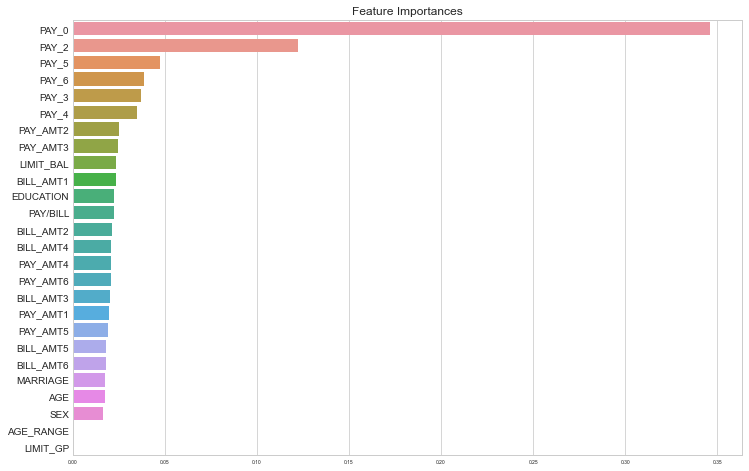

In [128]:
ftr_importances_values = xg_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.rc('xtick', labelsize=5)
plt.show()

In [129]:
import pickle

# 모델 저장
model = pickle.dumps(xg_clf)

# 모델 Read
model_loaded = pickle.loads(model)

In [137]:
submission = pd.DataFrame({'ID':X_test['ID'], 'prediction':pred_xg_clf})
submission

,ID,prediction
2281,2282,0
24369,24370,0
3942,3943,1
1904,1905,0
11287,11288,0
...,...,...
22922,22923,0
20305,20306,0
26236,26237,0
16579,16580,0
